In [1]:
push!(LOAD_PATH, pwd())
using CircleFit, DataGen

┌ Info: Precompiling CircleFit [top-level]
└ @ Base loading.jl:1260


In [2]:
using LinearAlgebra, Plots; pyplot();

In [3]:
const σ = 0.01
const N = 100
const Δθ = 2π / N;

In [4]:
noise() = σ * randn();

In [5]:
function circle_generator(xc::Float64, yc::Float64, r::Float64)
    xs = Vector{Float64}(undef, N)
    ys = Vector{Float64}(undef, N)
    for i = 1:N
        x = xc + r * cos(i * Δθ)
        y = yc + r * sin(i * Δθ)
        u = ([x, y] - [xc, yc]) / norm([x, y] - [xc, yc])
        rvec = (([x, y] - [xc, yc]) + noise() * u) + [xc, yc]
        xs[i] = rvec[1]
        ys[i] = rvec[2]
    end
    xs, ys
end

circle_generator (generic function with 1 method)

In [6]:
function circle(xc::Float64, yc::Float64, r::Float64)
    xs = Vector{Float64}(undef, N)
    ys = Vector{Float64}(undef, N)
    for i = 1:N
        xs[i] = xc + r * cos(i * Δθ)
        ys[i] = yc + r * sin(i * Δθ)
    end
    xs, ys
end;

circle (generic function with 1 method)

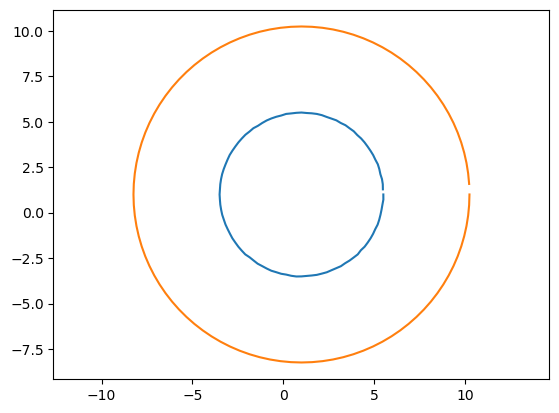

InterruptException: InterruptException:

In [18]:
fig, ax = PyPlot.subplots()
for r = 0.5:0.1:8.0
    x, y = circle_generator(1., 1., r)
    fit = FitCircle{Float64}(x, y)
    x′, y′ = circle(fit.xc, fit.yc, fit.r₀)
    ax.plot(x, y)
    ax.plot(x′, y′)
    ax.axis("equal")
    display(fig)
    PyPlot.pause(0.1)
    ax.cla()
    IJulia.clear_output(true)
end;

In [19]:
params = S21Params{Float64}();

In [20]:
fs = params.fᵣ-0.04:0.0001:params.fᵣ+0.04
vs = [S₂₁(f, params) for f in fs];

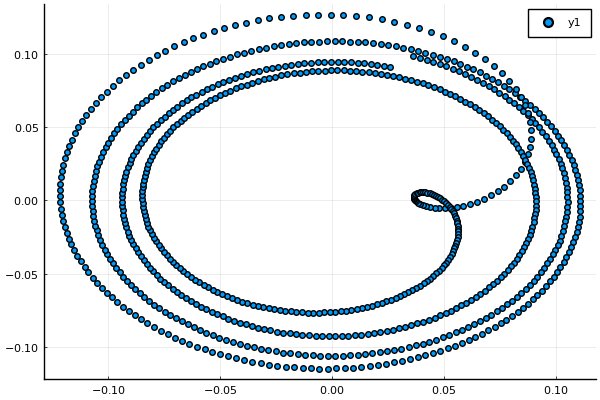

In [21]:
plot(real.(vs), imag.(vs), seriestype=:scatter, linewidth=.01)

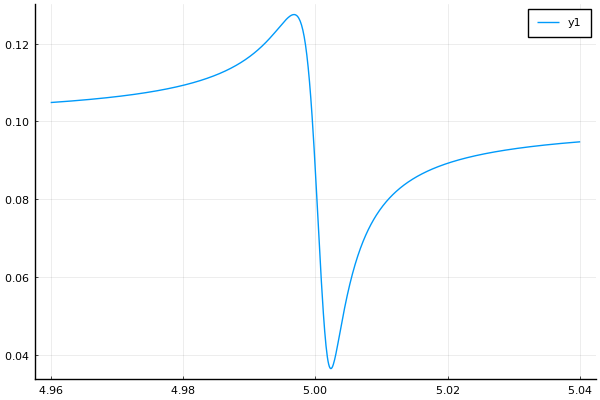

In [22]:
plot(fs, abs.(vs))